# LIFE BEYOND EARTH!
---
Project Members:
1. Saahil Hiranandani(saahilh2)
2. Manasi Karale(mkarale2)
---

## Hypothesis 1: All <font color='blue'>exoplanets</font> that fall in the <font color='blue'>habitable zone</font> of their system posses <font color='blue'>earth-like</font> conditions and vice-versa.


---
1. Planets that orbit around a star outside the solar system.
2. Orbital region around a star in which planets can posses liquid on its surface and possibly posses life.
3. Planets whose earth similarity index is 0.6 and above - A quantitative measure of departure from a reference state, usually on a scale from zero to one.

In [1]:
import pandas as pd
import constants as c
import data_analysis as da
import ipywidgets
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
all_exoplanets_with_esi = da.calculate_ESI(
    da.create_exoplanets_catalog(".\\data\\phl_exoplanet_catalog.csv")
)
all_exoplanets_with_esi[['P_NAME','P_calculated_ESI']].sort_values(by=['P_calculated_ESI'], ascending=False)

,P_NAME,P_calculated_ESI
3808,TRAPPIST-1 d,0.903853
3807,TRAPPIST-1 c,0.902225
1029,K2-18 b,0.813958
3809,TRAPPIST-1 e,0.813324
2890,Kepler-413 b,0.793707
...,...,...
1544,Kepler-1142 b,0.000000
1545,Kepler-1143 b,0.000000
1546,Kepler-1143 c,0.000000
1547,Kepler-1144 b,0.000000


In [3]:
planets_in_habitable_zone = da.get_habitable_zone_planets(all_exoplanets_with_esi)
planets_in_habitable_zone[['P_NAME', 
                           'P_DISTANCE', 
                           'S_HZ_OPT_MIN', 
                           'S_HZ_OPT_MAX',
                           'P_calculated_ESI']].sort_values(by=['P_calculated_ESI'], ascending=False)

,P_NAME,P_DISTANCE,S_HZ_OPT_MIN,S_HZ_OPT_MAX,P_calculated_ESI
3808,TRAPPIST-1 d,0.021493,0.019436,0.052568,0.903853
1029,K2-18 b,0.145758,0.120021,0.312115,0.813958
3809,TRAPPIST-1 e,0.028272,0.019436,0.052568,0.813324
3663,LHS 1140 b,0.093768,0.053340,0.140342,0.708638
3810,TRAPPIST-1 f,0.037174,0.019436,0.052568,0.695922
...,...,...,...,...,...
658,HD 221585 b,2.323444,1.219834,2.886608,0.000000
661,HD 222582 b,1.697043,0.850349,2.002759,0.000000
662,HD 224538 b,2.525437,1.261261,2.948968,0.000000
665,HD 23079 b,1.608000,0.847670,1.987366,0.000000


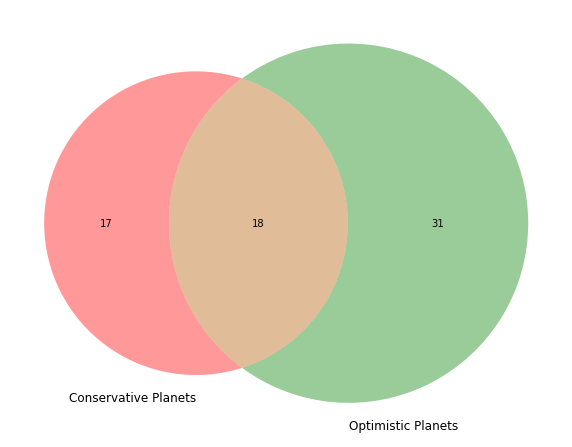

In [4]:
plt.figure(figsize=(10,10))
venn2([set(da.identify_habitability_type(planets_in_habitable_zone)[0]['P_NAME'].to_list()), 
       set(da.identify_habitability_type(planets_in_habitable_zone)[1]['P_NAME'].to_list())],
       set_labels=('Conservative Planets', 'Optimistic Planets')
     )
plt.show()

In [5]:
set(da.identify_habitability_type(planets_in_habitable_zone)[0]['P_NAME'].to_list()).intersection(
set(da.identify_habitability_type(planets_in_habitable_zone)[1]['P_NAME'].to_list()))

{'GJ 273 b',
 'GJ 667 C c',
 'K2-288 B b',
 'K2-296 b',
 'K2-3 d',
 'Kepler-1410 b',
 'Kepler-1544 b',
 'Kepler-1606 b',
 'Kepler-1638 b',
 'Kepler-1652 b',
 'Kepler-283 c',
 'Kepler-296 e',
 'Kepler-296 f',
 'Kepler-440 b',
 'Kepler-452 b',
 'Kepler-62 e',
 'Wolf 1061 c',
 'tau Cet e'}

In [6]:
potentially_habitable_exoplanets = da.get_potentially_habitable_exoplanets(all_exoplanets_with_esi)
potentially_habitable_exoplanets[['P_NAME','P_calculated_ESI']].sort_values(by=['P_calculated_ESI'], ascending=False)

,P_NAME,P_calculated_ESI
3808,TRAPPIST-1 d,0.903853
3807,TRAPPIST-1 c,0.902225
1029,K2-18 b,0.813958
3809,TRAPPIST-1 e,0.813324
2890,Kepler-413 b,0.793707
1851,Kepler-138 c,0.791120
3806,TRAPPIST-1 b,0.771585
1852,Kepler-138 d,0.768840
3664,LHS 1140 c,0.761213
3667,LTT 1445 A b,0.748333


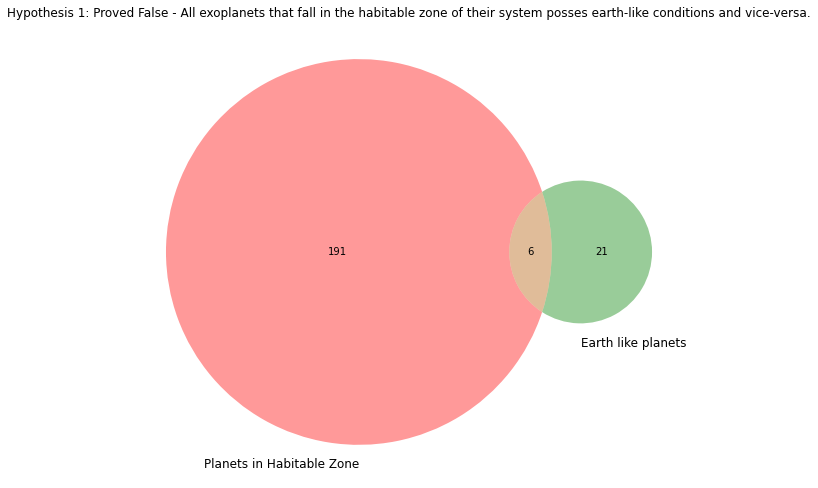

In [7]:
plt.figure(figsize=(10,10))
plt.title('Hypothesis 1: Proved False - All exoplanets that fall in the habitable zone of their system posses earth-like conditions and vice-versa.')
venn2([set(planets_in_habitable_zone['P_NAME'].to_list()), 
       set(potentially_habitable_exoplanets['P_NAME'].to_list())],
       set_labels=('Planets in Habitable Zone', 'Earth like planets')
     )
plt.show()

In [8]:
set(planets_in_habitable_zone['P_NAME'].to_list()).intersection(set(potentially_habitable_exoplanets['P_NAME'].to_list()))

{'K2-18 b',
 'LHS 1140 b',
 'TRAPPIST-1 d',
 'TRAPPIST-1 e',
 'TRAPPIST-1 f',
 'TRAPPIST-1 g'}

In [9]:
frames = [planets_in_habitable_zone, potentially_habitable_exoplanets]
combined_planets = pd.concat(frames).drop_duplicates().reset_index(drop=True)
combined_planets = combined_planets.sort_values(by=['S_HZ_OPT_MAX'], ascending=True)

In [10]:
@ipywidgets.interact(planet_name = combined_planets['P_NAME'].tolist(), value='')
def plot_habitable_zone(planet_name):
    planet_values = combined_planets.loc[combined_planets['P_NAME']==planet_name]
    figure, axes = plt.subplots(figsize=(10,10))
    plt.axis([0,2,0,2])
    star_position = plt.Circle(
        (1, 1),
        planet_values['S_RADIUS_EST'] * 0.00465047,
        color='k') 
    planet_orbit = plt.Circle(
        (1, 1),
        planet_values['P_DISTANCE'],
        color='r',
        fill = False,
        linewidth=4) 
    inner_edge_optimistic = plt.Circle(
        (1, 1),
        planet_values['S_HZ_OPT_MIN'],
        color='g',
        fill = False) 
    inner_edge_conservative = plt.Circle(
        (1, 1),
        planet_values['S_HZ_CON_MIN'],
        color='b',
        fill = False) 
    outer_edge_conservative = plt.Circle(
        (1, 1),
        planet_values['S_HZ_CON_MAX'],
        color='b',
        fill = False) 
    outer_edge_optimistic = plt.Circle(
        (1, 1),
        planet_values['S_HZ_OPT_MAX'],
        color='g',
        fill = False) 
    axes.set_aspect(1)
    axes.add_artist(star_position)
    axes.add_artist(planet_orbit)
    axes.add_artist(inner_edge_optimistic)
    axes.add_artist(inner_edge_conservative)
    axes.add_artist(outer_edge_conservative)
    axes.add_artist(outer_edge_optimistic)
    black_patch = mpatches.Patch(color='black', label='Star')
    red_patch = mpatches.Patch(color='red', label='Planet Orbit')
    green_patch = mpatches.Patch(color='green', label='Optimistic zone')
    blue_patch = mpatches.Patch(color='blue', label='Conservative zone')
    figure.legend(handles=[red_patch, blue_patch, black_patch, green_patch])
    plt.title(planet_name)
    plt.axis('off')
    plt.show()

interactive(children=(Dropdown(description='planet_name', options=('TRAPPIST-1 c', 'TRAPPIST-1 f', 'TRAPPIST-1…

In [11]:
common_planets = pd.merge(planets_in_habitable_zone, potentially_habitable_exoplanets, how ='inner', left_on=['P_NAME', 'P_MASS', 'P_RADIUS', 'P_TEMP_MEASURED', 'P_ESCAPE', 'P_DENSITY', 'P_DISTANCE',
                        'P_FLUX', 'P_TEMP_EQUIL', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 'S_RADIUS_EST',
                        'S_NAME', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX',
                        'P_HABITABLE', 'P_RADIUS_EST', 'P_MASS_EST', 'P_calculated_ESI'], right_on=['P_NAME', 'P_MASS', 'P_RADIUS', 'P_TEMP_MEASURED', 'P_ESCAPE', 'P_DENSITY', 'P_DISTANCE',
                        'P_FLUX', 'P_TEMP_EQUIL', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 'S_RADIUS_EST',
                        'S_NAME', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX',
                        'P_HABITABLE', 'P_RADIUS_EST', 'P_MASS_EST', 'P_calculated_ESI'])
common_planets

,P_NAME,P_MASS,P_RADIUS,P_TEMP_MEASURED,S_NAME,P_ESCAPE,P_DENSITY,P_DISTANCE,P_FLUX,P_TEMP_EQUIL,...,P_TEMP_EQUIL_MAX,S_RADIUS_EST,S_HZ_OPT_MIN,S_HZ_OPT_MAX,S_HZ_CON_MIN,S_HZ_CON_MAX,P_HABITABLE,P_RADIUS_EST,P_MASS_EST,P_calculated_ESI
0,K2-18 b,8.921432,2.36531,0.0,K2-18,1.942107,0.674171,0.145758,1.075112,257.45111,...,288.56740,0.41,0.120021,0.312115,0.152023,0.295907,2,2.36531,8.921432,0.813958
1,LHS 1140 b,6.979503,1.72634,0.0,LHS 1140,2.010708,1.356580,0.093768,0.483307,212.27899,...,218.99838,0.21,0.053340,0.140342,0.067563,0.133053,2,1.72634,6.979503,0.708638
2,TRAPPIST-1 d,0.409998,0.77349,0.0,TRAPPIST-1,0.728054,0.885967,0.021493,1.206561,266.76719,...,276.70953,0.12,0.019436,0.052568,0.024618,0.049836,1,0.77349,0.409998,0.903853
3,TRAPPIST-1 e,0.619765,0.91922,0.0,TRAPPIST-1,0.821114,0.797937,0.028272,0.699734,232.69554,...,243.37390,0.12,0.019436,0.052568,0.024618,0.049836,1,0.91922,0.619765,0.813324
4,TRAPPIST-1 f,0.680152,1.04253,0.0,TRAPPIST-1,0.807716,0.600261,0.037174,0.402762,202.80710,...,209.56620,0.12,0.019436,0.052568,0.024618,0.049836,1,1.04253,0.680152,0.695922
5,TRAPPIST-1 g,1.341234,1.13221,0.0,TRAPPIST-1,1.088401,0.924110,0.045184,0.272514,183.94526,...,189.87025,0.12,0.019436,0.052568,0.024618,0.049836,1,1.13221,1.341234,0.693644


---
---
---

## Hypothesis 2: If any of the exoplanets possesses similar conditions in which an Extremophile can survive, then those planets could potentially host life.

Based on the analysis done in Hypothesis one, we have all potentially habitable planets which in theory should sustain life.

In [12]:
import data_analysis
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib_venn as vplt
pd.set_option('max_colwidth', 800)
import warnings
warnings.filterwarnings("ignore", message="Glyph 13 missing from current font.")

Extracting data from the analysis to get extremophiles that can survive extreme Temperatures, Pressures and Radiation.

In [13]:
# exoplanets_catalog_esi = data_analysis.calculate_ESI(data_analysis.create_exoplanets_catalog(".\\data\\phl_exoplanet_catalog.csv"))
# potentially_habitable_exoplanets = exoplanets_catalog_esi.loc[(exoplanets_catalog_esi['P_calculated_ESI'] >= 0.6)]
surviving_extremophiles = data_analysis.identifying_surviving_extremophiles(".\\data\\Extremophiles Range.csv", common_planets)

temperature_surviving_extremophiles = surviving_extremophiles[0]
pressure_surviving_extremophiles = surviving_extremophiles[1]
radiation_surviving_extremophiles = surviving_extremophiles[2]

## Thermophiles - Extremophiles that can survive Extreme Temperatures

Here is a plot of extremophiles that can surive Extreme Temperatures ranging from 275K (1.85°C or 35.33°F) to 395K (121.85°C or 251.33°F)

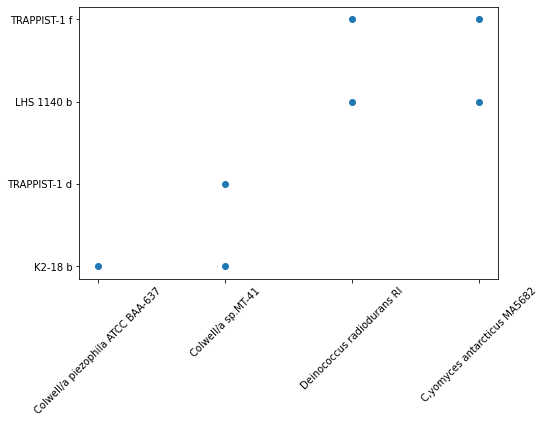

In [14]:
fig, ax = plt.subplots()
ax.scatter(temperature_surviving_extremophiles.Strain, temperature_surviving_extremophiles.P_NAME, )
fig.set_size_inches(7.5, 5)
plt.xticks(rotation = 45)
plt.show()

## Piezophiles or Vaccum Tolerants - Extremophiles that can survive Extreme Pressures

Here is a plot of extremophiles that can surive Extreme Pressures ranging from 0.01 Bar to 1250 Bar. For Comparison Earth's Surface Pressure is 1.013 Bar

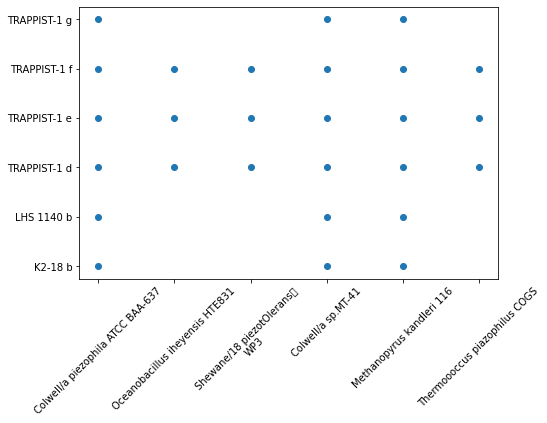

In [15]:
fig, ax = plt.subplots()
ax.scatter(pressure_surviving_extremophiles.Strain, pressure_surviving_extremophiles.P_NAME)
fig.set_size_inches(7.5, 5)
plt.xticks(rotation = 45)
plt.show()

## Gammatolerans - Extremophiles that can survive Extreme Radiation

Here is a plot of extremophiles that can surive Extreme Radiation from stellar flux ranging upto 5000 W/m^2.

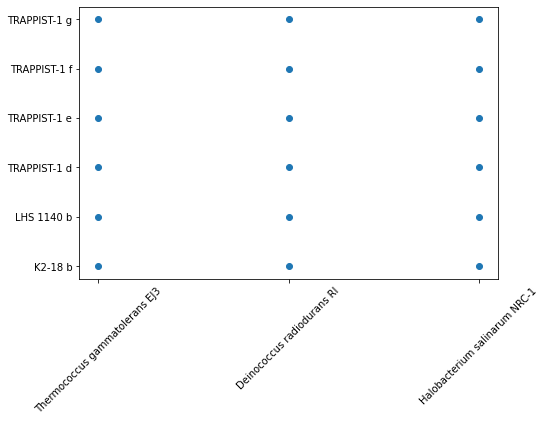

In [16]:
fig, ax = plt.subplots()
ax.scatter(radiation_surviving_extremophiles.Strain, radiation_surviving_extremophiles.P_NAME)
fig.set_size_inches(7.5, 5)
plt.xticks(rotation = 45)
plt.show()

### A Venn diagram combining all three types of extremophiles

In [17]:
temperature_surviving_extremophiles = temperature_surviving_extremophiles.groupby('Strain').agg({'P_NAME': lambda x: ', '.join(x)})
temperature_surviving_extremophiles

,P_NAME
Strain,
"C,yomyces antarcticus MA5682","LHS 1140 b, TRAPPIST-1 f"
Colwell/a piezophila ATCC BAA-637,K2-18 b
Colwell/a sp.MT-41,"K2-18 b, TRAPPIST-1 d"
Deinococcus radiodurans Rl,"LHS 1140 b, TRAPPIST-1 f"


In [18]:
pressure_surviving_extremophiles = pressure_surviving_extremophiles.groupby('Strain').agg({'P_NAME': lambda x: ', '.join(x)})
pressure_surviving_extremophiles

,P_NAME
Strain,
Colwell/a piezophila ATCC BAA-637,"K2-18 b, LHS 1140 b, TRAPPIST-1 d, TRAPPIST-1 e, TRAPPIST-1 f, TRAPPIST-1 g"
Colwell/a sp.MT-41,"K2-18 b, LHS 1140 b, TRAPPIST-1 d, TRAPPIST-1 e, TRAPPIST-1 f, TRAPPIST-1 g"
Methanopyrus kandleri 116,"K2-18 b, LHS 1140 b, TRAPPIST-1 d, TRAPPIST-1 e, TRAPPIST-1 f, TRAPPIST-1 g"
Oceanobacillus iheyensis HTE831,"TRAPPIST-1 d, TRAPPIST-1 e, TRAPPIST-1 f"
Shewane/18 piezotOlerans\r\nWP3,"TRAPPIST-1 d, TRAPPIST-1 e, TRAPPIST-1 f"
Thermoooccus piazophilus COGS,"TRAPPIST-1 d, TRAPPIST-1 e, TRAPPIST-1 f"


In [19]:
radiation_surviving_extremophiles = radiation_surviving_extremophiles.groupby('Strain').agg({'P_NAME': lambda x: ', '.join(x)})
radiation_surviving_extremophiles

,P_NAME
Strain,
Deinococcus radiodurans Rl,"K2-18 b, LHS 1140 b, TRAPPIST-1 d, TRAPPIST-1 e, TRAPPIST-1 f, TRAPPIST-1 g"
Halobacterium salinarum NRC-1,"K2-18 b, LHS 1140 b, TRAPPIST-1 d, TRAPPIST-1 e, TRAPPIST-1 f, TRAPPIST-1 g"
Thermococcus gammatolerans EJ3,"K2-18 b, LHS 1140 b, TRAPPIST-1 d, TRAPPIST-1 e, TRAPPIST-1 f, TRAPPIST-1 g"


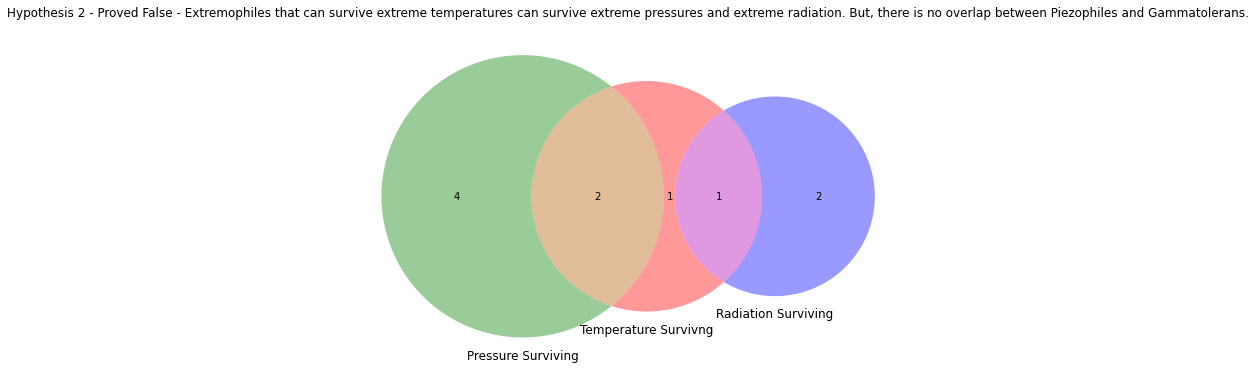

In [20]:
plt.figure(figsize=(10,10))
plt.title("Hypothesis 2 - Proved False - Extremophiles that can survive extreme temperatures can survive extreme pressures and extreme radiation. But, there is no overlap between Piezophiles and Gammatolerans.")
v = vplt.venn3([set(temperature_surviving_extremophiles.index.to_list()),
       set(pressure_surviving_extremophiles.index.to_list()),
       set(radiation_surviving_extremophiles.index.to_list()),
      ],
       set_labels=('Temperature Survivng', 'Pressure Surviving', 'Radiation Surviving')
     )
plt.show()

## Conclusion

Even though exoplanets fall in the habitable zone of thier respective star they do not necessarily posses earth like conditions and vice a versa. Since there is no overlap between all three parameters considered, there are no potentially habitable exoplanets where an extremophile can survive given all three conditions. Hence proving our hypothesis false.

"The Earth is the only world known so far to harbor life. There is nowhere else, at least in the near future, to which our species could migrate. Visit, yes. Settle, not yet. Like it or not, for the moment the Earth is where we make our stand." 
       - Carl Sagan

# NO LIFE BEYOND EARTH!